In [52]:
#| include: false

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
#| echo: false

import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
from IPython.display import HTML

In [54]:
#| echo: false


import sys
sys.path.append('../py')

from plots import (
 compare_distributions_in_plot
)

sns.set_style("ticks")

In [55]:
#| echo: false
with open('../html/shannon_diagram_transmitter-to-receiver.html', 'r', encoding='utf-8') as f:
    noisy_channel_transmitter_receiver_html = f.read()

# KL Divergence: Differences Between Expected Differences
## Transmitter and Receiver: Expectation vs. Reality

Let's reiterate what we've learned so far.

First, we've learned to calculate:

1. The bits to encode the outcomes of *one* distribution
2. The average bits for this encoding

Second, we know that:

1. The information entropy of *one* distribution consists of the weighted sum of bits.
2. Entropy measures surprise. The more uniform, the higher the entropy. An entirely uniform distribution is the "maximum entropy" distribution.

What this amounts to, is a comprehensive understanding of how to  *en*code messages, the "transmitter" part of the noisy channel, if you will. However, now it's time to look at the evaluation of the efficiency of our encoding, and the reception and *de*coding of these messages through the receiver. 

On a more general level, both the efficient encoding of messages and their accurate decoding gets us in the domain of **comparing distributions**. In the first case, we are trying to compare encodings to determine which one is the most efficient. In the second case, we are comparing the signal we encoded through the transmitter with the one received through the receiver, in order to ascertain their similarity.

We can think of modern machine learning in a similar way. When we train a model to predict outcomes, we want to compare our predictions with the observed outcomes in the data. This is why the tools that we introduce in this chapter, culminating in cross-entropy, are so crucial for most AI models today. And this is also one way in which the Noisy Channel lives on as a metaphor that structures our world in very material and real ways.

In [ ]:
#| echo: false

HTML(noisy_channel_transmitter_receiver_html)

## Comparing Distributions: Relative Entropy & Redundancy

Recall from the previous section two versions of our language $A$, $B$, $C$ and $D$. In the first instance, the language was uniform, all symbols were equally likely. This was also the "maximum entropy distribution". In the second instance, we defined specific and varying probabilities for each symbol. Let's now compare these two distributions which are, in fact, examples taken straight out of Shannon's foundational paper. 

We start by defining the symbols and the two probability distributions for them. Then, using an imported helper function, we plot their probabilities, side-by-side.

In [58]:
language = ['A', 'B', 'C', 'D']
uniform_probs = [0.25]*4
lang_probs = [0.5, 0.25, 0.125, 0.125]

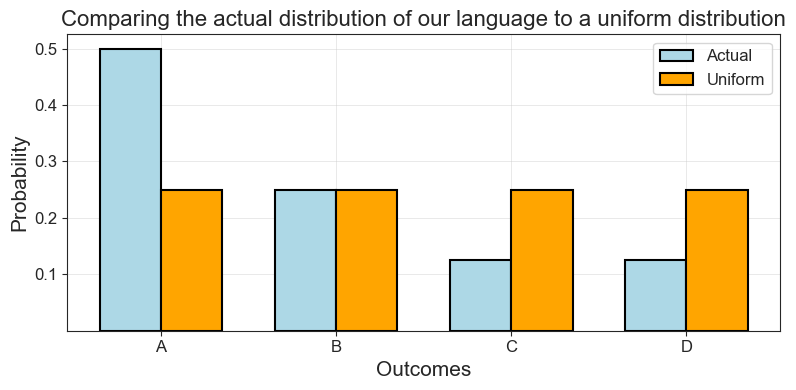

In [ ]:
compare_distributions_in_plot(language, 
                              lang_probs, 
                              uniform_probs,
                              'Actual',
                              'Uniform',
                              'Outcomes',
                              'Probability',
                              'Comparing the actual distribution of our language to a uniform distribution')

How could we, first of all, quantify the difference here? One way would be to simply take their ratio. Following Shannon, we will call this ratio between the entropy of a source and a max entropy representation of it **"relative entropy"**:

:::{.column-margin}
Shannon introduces this concept in his work to describe the difference between the entropy of our source and a completely uniform version of the same source. In Shannon's (p. 56) own words:

> The ratio of the entropy of a source to the maximum value it could have while still restricted to the same symbols will be  called its *relative entropy*.

Shannon, C. E. (1948). *A Mathematical Theory of Communication. The Bell System Technical Journal*, 27(3), 379–423. [[URL]](https://doi.org/10.1002/j.1538-7305.1948.tb01338.x)

:::

$$
\text{Relative entropy} = \frac{\text{Entropy of a distribution}}{\text{The max entropy of the same distribution}}
$$



**PROMPT:** Can you write that in Python for our example above? Wrap it in a function like this: ```def relative_entropy(true_ent, max_ent)```.

**Hint:** Recall the entropies of these two distributions:

In [17]:
def entropy_np(p):
    p = np.array(list(p))
    p = p[p > 0]
    return -np.sum(p * np.log2(p))

In [60]:
#| code-fold: true

uniform_entropy = entropy_np(uniform_probs)
uniform_entropy.item()

2.0

In [61]:
#| code-fold: true

lang_entropy = entropy_np(lang_probs)
lang_entropy.item()

1.75

In [62]:
#| code-fold: true

def relative_entropy(true_ent, max_ent):
    return true_ent / max_ent

In [63]:
#| code-fold: true

relative_entropy(lang_entropy, uniform_entropy).item()

0.875

What does relative entropy capture then? Weaver gets into this question in his intro to Shannon's work:

:::{.column-margin}
Shannon, C. E., & Weaver, W. (1963). *The Mathematical Theory of Communication* (1st paperback). University of Illinois Press.
:::

> If the relative entropy of a certain source is, say .8, this roughly means that this source is, in its choice of symbols to form a message, about 80 per cent as free as it could possibly be with these same symbols. 

Shannon himself did a bunch of experiments to conclude that the redundancy of written English is about 50%. In his opinion:

:::{.column-margin}
Shannon, C. E. (1948).[[URL]](https://doi.org/10.1002/j.1538-7305.1948.tb01338.x)
:::

> This means that when we write English half of what we write is determined by the structure of the language and half is chosen freely.

One way to better understand what relative entropy captures, is by looking at it's relationship to **redundancy**. Shannon defined **redundancy** in terms of relative entropy as:

:::{.column-margin}
> The redundancy [...] measures the amount of constraint imposed on a text in the language due to its statistical structure, e.g., in English the high frequency of the letter E, the strong tendency of H to follow T or of U to follow Q.

Shannon, C. E. (1951). Prediction and Entropy of Printed English. [[URL]](https://doi.org/10.1002/j.1538-7305.1951.tb01366.x)
:::

$$
\text{Redundancy }= 1-\text{ Relative Entropy}
$$

Relative entropy tells us how much freedom we have and redundancy tells us how much we lack. The uniform distribution is total freedom: Everything is equally possible! Once we add structure, our choices become more constrained. According to Shannon, redundancy

From the vocabulary of information theory, the concept of "redundancy" was one that evoked particularly strong responses from social scientist. It figures prominently in the work of French structuralist authors as Roman Jakobson, Jacques Lacan, and Claude Lévi-Strauss, as well as American linguists like Zellig Harris. In general, these authors identified redundancy with the concept of "meaning", presaging in the process the distributionist hypothesis that would later come to legitimate the attribution of semantic capacities to AI models.

In a critical note, Gregory Bateson wrote:

> By confining their attention to the internal structure of the message material, the engineers believe that they can avoid the complexities and difficulties introduced into communication theory by the concept of "meaning." I would argue, however, that the concept “redundancy” is at least a partial synonym of “meaning."

:::{.column-margin}
Bateson, G. (2000). "Redundancy and Coding" in *Steps to an Ecology of Mind*. University of Chicago Press.
:::

There are some interesting philosophical implications here: Our use of language is just the actualization of the virtual space of possible outcomes, governed by statistical rules. A decisively posthuman and post-organic vision of communication, as Bernard Geoghegan has pointed out. 

:::{.column-margin}
> Shannon’s theory may be described as “posthuman” (in the sense N. Katherine Hayles has used that term), insofar as it dispensed with the centrality of humans in the communications process. However, it was also post-organic—it overturned the centrality living organisms played in most accounts of communications (including Wiener’s), preferring to view communications as a kind of automatism inscribed in the broadest range of statistically based phenomena.

Geoghegan, B. D. (2019). Architectures of information—A comparison of Wiener’s and Shannon’s theories of information. In T. Vardouli & O. Touloumi (Eds.), *Computer Architectures: Constructing the Common Ground*. Routledge.

:::

**PROMPT:** What is the redundancy of our artificial language?

First, we calculate the relative entropy.

In [64]:
relative_entropy(lang_entropy, uniform_entropy).item()

0.875

Then, to calculate the reduncancy we just subtract the relative entropy from one:

In [65]:
1-relative_entropy(lang_entropy, uniform_entropy).item()

0.125

While Shannon and Weaver limited their analysis of relative entropy to the ratio between the entropy of a source and its max entropy, the principle of calculating such ratios can be extended.

Let's now instead say that we are familiar with the language $A$, $B$, $C$ $D$, but we don't quite know what the probabilities for each outcome are. Based on our prior knowledge, we would guess it is something like this:

$$
\begin{aligned}
p(A) &= 0.625 \\
p(B) &= 0.125 \\
p(C) &= 0.125 \\
p(D) &= 0.125
\end{aligned}
$$

In [24]:
assumed_probs = [0.625, 0.125, 0.125, 0.125]
sum(assumed_probs)

1.0

Comparing these visually, we see that it's an okay estimation.

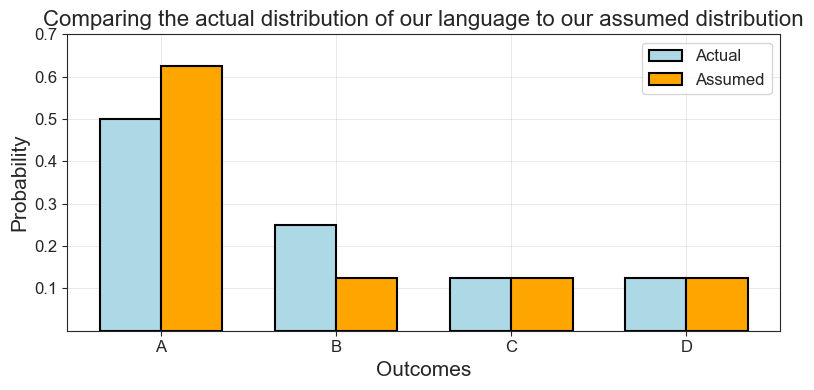

In [25]:
compare_distributions_in_plot(language, 
                              lang_probs, 
                              assumed_probs,
                              'Actual',
                              'Assumed',
                              'Outcomes',
                              'Probability',
                              'Comparing the actual distribution of our language to our assumed distribution')

The entropy for our estimate is:

In [66]:
assumed_entropy = entropy_np(assumed_probs)
assumed_entropy.item()

1.5487949406953985

And compared to you actual entropy, we see that our assumed language is actually more structured. The high probability given to $A$ makes it more deterministic:

In [67]:
relative_entropy(lang_entropy, assumed_entropy).item()

1.1299107157557358

Let's stop for a moment to recall what we set out to do: We wanted to find a metric to measure the difference between different probability distributions. Have we accomplished this goal?

Well yes, kind of. But there's a problem. 

<details>
<summary>**PROMPT:** What might isse be with using relative entropy to compare distributions?</summary><br>

Well, the problem is that relative entropy doesn't account for the individual probabilities of our outcomes. What kind of issues might this create? Let's clarify with an example.

Imagine our language from above, but with inverse probabilities. So:

$$
\begin{aligned}
p(A) &= 0.125 \\
p(B) &= 0.125 \\
p(C) &= 0.25  \\
p(D) &= 0.5
\end{aligned}
$$

</details>

In [28]:
inverse_probs = lang_probs.copy()
inverse_probs.reverse()
inverse_probs

[0.125, 0.125, 0.25, 0.5]

Now we see that while our distributions have shaped that mirror each other, our estimate would surely produce terrible predictions!

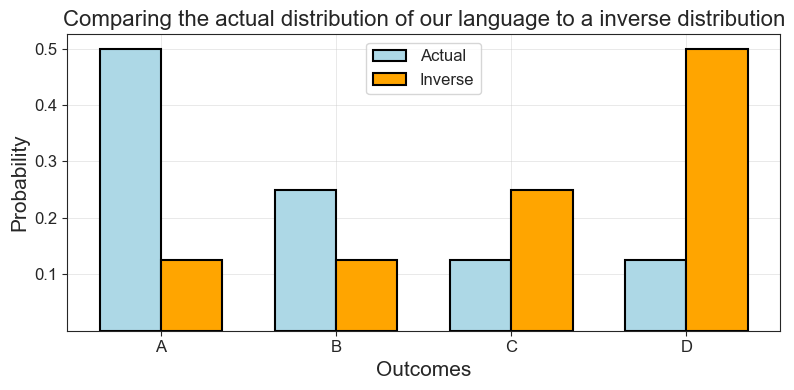

In [29]:
compare_distributions_in_plot(language, 
                              lang_probs, 
                              inverse_probs,
                              'Actual',
                              'Inverse',
                              'Outcomes',
                              'Probability',
                              'Comparing the actual distribution of our language to a inverse distribution')

**PROMPT:** What is the relative entropy between these two distributions?

In [68]:
reversed_entropy = entropy_np(inverse_probs)
reversed_entropy.item()

1.75

In [69]:
relative_entropy(lang_entropy, reversed_entropy).item()

1.0

In [70]:
relative_entropy(lang_entropy, lang_entropy).item()

1.0

Relative entropy says nothing about the actual shape of the distribution, it just tells what it's mean is. We will need sharper tools to actually compare distributions. But we will still use entropy!

## Comparing Distributions: The Kullback-Leibler Divergence

Today, no one uses relative entropy or redundancy in machine learning, at least not in the sense that they were defined by Shannon. Instead, people use metrics that were further developed from the idea of relative entropy by other people who built on Shannon's work.

One particularly important measure like this is the Kullback-Leibler Divergence or $\mathbb{KL}$, that was developed by mathemtaicians Solomon Kullback and Richard Leibler in a 1951 paper. While they didn't name it after themselves, other people since then have started using this name.  It is also from the $\mathbb{KL}$ divergence that cross-entropy, the perhaps most commonly used tool for comparing distributions in machine learning, is derived.

:::{.column-margin}
> This note generalizes to the abstract case Shannon's definition  of information.

Kullback, S., & Leibler, R. A. (1951). On Information and Sufficiency. *The Annals of Mathematical Statistics*, 22(1), 79–86. [[URL]](https://doi.org/10.1214/aoms/1177729694)
:::

Let's start with intuition again.

What if for every outcome $x_i$ for our random variable $X$, we compared the number of bits we need to encode that outcome?

**PROMPT:** Can you code such a for-loop in Python?

In [71]:
#| code-fold: true

entropy_diff = 0

for p in lang_probs:
    entropy_diff += (np.log2(p) - np.log2(0.25))
entropy_diff.item()

-1.0

What? We actually need in total one bit more to encode our structured language than we need for the uniform distribution. And indeed, this is true, we see it from our bit tables:

In [34]:
def print_bit_table(outcome, bits, probs):
    n_bits = [len(b) for b in bits]
    
    return pd.DataFrame(
        {'outcomes':outcome, 
         'bits':bits, 
         'n_bits':n_bits,
         'prob':np.round(probs, 3).astype(str)
        }).style.hide()

In [35]:
lang_bits = ['0', '10', '110', '111']
print_bit_table(language, lang_bits, lang_probs)

outcomes,bits,n_bits,prob
A,0,1,0.5
B,10,2,0.25
C,110,3,0.125
D,111,3,0.125


In [36]:
uniform_bits = ['00', '01', '10', '11']
print_bit_table(language, uniform_bits, uniform_probs)

outcomes,bits,n_bits,prob
A,00,2,0.25
B,01,2,0.25
C,10,2,0.25
D,11,2,0.25


In [37]:
print_bit_table(language, uniform_bits, uniform_probs)

outcomes,bits,n_bits,prob
A,00,2,0.25
B,01,2,0.25
C,10,2,0.25
D,11,2,0.25


Our structured language requires 9 bits to encode, our uniform distribution only takes 8:

In [38]:
n_lang_bits = [1,2,3,3]

In [39]:
print(sum(n_lang_bits))
print(4*2)

9
8


But entropy isn't about sums, it's about **weighted sums**, also known as **"expected value"** or, simply, **"mean"**.

So if we rewrite our loop, but now weigh every difference. What should we weigh it by? Well, how about using the probabilities of the actual distribution we are interested in? Weighing the loop with the probabilities of our language, we get:

In [72]:
entropy_diff = 0

for p in lang_probs:
    entropy_diff += p*(np.log2(p) - np.log2(0.25))
entropy_diff.item()

0.25

What we now get is the distance of the uniform distribution from the vantage point of our the probabilities of our artificial language. And this is the $\mathbb{KL}$ divergence! That's all there is to it. Let's write it in numpy and try it out.

**PROMPT:** Write the $\mathbb{KL}$ divergence in ```numpy```.

**Hint:** Here you have it as a loop:

In [75]:
def kl_divergence_loop(p, q):
    kld = 0
    for idx, p in enumerate(lang_probs):
        kld += p*(np.log2(p) - np.log2(q[idx]))
    return kld

In [76]:
#| code-fold: true

def kl_divergence(p, q):
    return np.sum(p * np.log2(p / q), 0)

Nice! Let's try it out:

Our uniform distribution is on average 0.25 bits away from our actual distribution.

In [78]:
kl_divergence(np.array(lang_probs), np.array(uniform_probs)).item()

0.25

Why is this true? Because, as we saw above, their total distance is $1$, so with four outcomes the average distance is $\frac{1}{4} = 0.25$.

Our estimate for the language is already a lot closer:

In [79]:
kl_divergence(np.array(lang_probs), np.array(assumed_probs)).item()

0.08903595255631885

Then, if we compare our language to itself, the distance is $0$:

This means that we know exactly what distribution $P$ generated the data and the difference in bits needed to encode the distributions is zero. In other words, as Kevin Murphy has written,

> it means that we can correctly predict the probabilities of all possible future events, and thus we have learned to predict the future as well as an ’oracle’ that has access to the true distribution P (p. 243).

:::{.column-margin}
Murphy, K. P. (2021). *Probabilistic Machine Learning: An Introduction.* MIT Press. [[probml.ai]](probml.ai)
:::

Finally, how does the $\mathbb{KL}$ divergence do on our inverse distribution?

In [80]:
kl_divergence(np.array(lang_probs), np.array(inverse_probs)).item()

0.875

Quite well, it turns out! Whereas relative entropy was unable to distinguish them, $\mathbb{KL}$ divergence shows that they are further away from each other than any other distributions we compared.

If we wanted to formally derive $\mathbb{KL}$ divergence from the definition of entropy, we could do something like this:

\begin{aligned}
\mathbb{KL}(p \Vert q)
    &= \overbrace{E\big[\log_2 p(x_i) - \log_2 q(x_i)\big]}^{{\text{Expected surprise of p when encoding with q}}} \\
    &= \sum_i p(x_i) \big[\log_2 p(x_i) - \log_2 q(x_i)\big] \\
    &= \sum_i p(x_i) \log_2 \frac{p(x_i)}{q(x_i)} \\
    &= \sum_i p(x_i)\log_2 p(x_i) - \sum_i p(x_i)\log_2 q(x_i) \\
    &= \underbrace{-\mathbb{H}(p)}_{\text{Negentropy of p}} + \underbrace{\mathbb{H}(p,q)}_{\text{Cross-entropy between p and q}}
\end{aligned}

Looks hard? Well, sure. But mostly because we aren't familiar with the notation and the associated rules of different symbols. Building up the intuition slowly and in code, it's hopefully more clear!

Now we can move on to our last part: **cross-entropy**. This function is the last terms of the $\mathbb{KL}$ divergence above and probably the most commonly used optimization function in neural networks today.

## Comparing Distributions: Cross-Entropy

With cross-entropy, we take a step back and go to the original definition of entropy. However, now we ask instead: What if we encoded our artificial language with bits corresponding to some other language. For example, what if we used the bits for the uniform distribution to encode the artificial language? How many bits would we then need on average?

:::{.column-margin}
Cross-entropy is generally attributed to British Mathematician Irvin Good.
<br>
<br>
Good, I. J. (1963). Maximum Entropy for Hypothesis Formulation, Especially for Multidimensional Contingency Tables. *The Annals of Mathematical Statistics*, 34(3), 911–934.[[URL]](https://www.jstor.org/stable/pdf/2238473.pdf)
:::

Let's say the distributions $P$ and $Q$ have the same outcomes $x_i$, but with different probabilities $p(x_i)$ and $q(x_i)$. Then, in terms of our equation for information, it would look like this:

$$
\begin{equation}
  \mathbb{H}(P,Q) = -\overbrace{\sum_{i=1}^N p(x_i)}^\text{Weighted sum for P} \underbrace{\log_2 q(x_i)}_\text{Bits for Q}
\end{equation}
$$

We can modify our $\mathbb{KL}$ divergence loop accordingly.

**PROMPT:** Write cross-entropy with a for-loop or in ```numpy```. **Hint:** You can use both the for-loop and ```numpy```implementations of $\mathbb{KL}$ divergence and the equation above.

In [82]:
#| code-fold: true

def cross_entropy_loop(p, q):
    ce = 0
    for idx, p in enumerate(lang_probs):
        ce += p*(- np.log2(q[idx]))
    return ce.item()

In [83]:
cross_entropy_loop(lang_probs, uniform_probs)

2.0

In [84]:
#| code-fold: true

def cross_entropy_np(p, q):
    return -np.sum(p * np.log2(q)).item()

In [85]:
cross_entropy_np(lang_probs, uniform_probs)

2.0

What do these numbers tell us? Well, just how many bits we need on average to encode our artificial language if we instead assume it is uniform. For our estimate, it's already lower:


In [86]:
cross_entropy_np(lang_probs, assumed_probs)

1.839035952556319

But the most efficient encoding is achieved using the actual distribution of the langauge itself. And, indeed, the cross-entropy between our language and itself is just the entropy of the language! Like plain old entropy, it tells us how many bits we need on average to code the language with it's own encoding.

In [87]:
cross_entropy_np(np.array(lang_probs), np.array(lang_probs))

1.75

And that's it! You now know as much if not a lot more information theory as most people doing machine learning. In the next section, we will see how cross-entropy is used in language modelling in a manner that reproduces Noisy Channel thinking.